In [2]:
def matrice(dico):
    n = len(dico)
    A = [[0 for j in range(n)] for i in range(n)]
    for i in dico:
        for j in dico[i]:
            A[i][j] = 1
    # return A
    # ou par compréhension
    return [[int(i in dico and j in dico[i]) for j in range(n)]
            for i in range(n)]


def dictionnaire(A):
    n = len(A)
    dic = {}
    for i in range(n):
        # if i not in dic:
        dic[i] = []
        for j in range(len(A[i])):
            if A[i][j] == 1:
                dic[i].append(j)
    return dic


def degres(A):
    n = len(A)
    dico = dictionnaire(A)
    for i in dico:
        dico[i] = len(dico[i])
    return dico


d = {0: [1, 2, 3], 1: [0, 3], 2: [0, 3], 3: [0, 1, 2, 4], 4: [1, 3]}
A = matrice(d)
print(A, dictionnaire(A))
degres(A)


[[0, 1, 1, 1, 0], [1, 0, 0, 1, 0], [1, 0, 0, 1, 0], [1, 1, 1, 0, 1], [0, 1, 0, 1, 0]] {0: [1, 2, 3], 1: [0, 3], 2: [0, 3], 3: [0, 1, 2, 4], 4: [1, 3]}


{0: 3, 1: 2, 2: 2, 3: 4, 4: 2}

In [3]:
def parcours(dico, sommet, visites=[]):
    if sommet not in visites:
        visites.append(sommet)
        avisiter = [s for s in dico[sommet] if s not in visites]
        for s in avisiter:
            parcours(dico, s, visites)
    return visites


def connexe(dico):
    return len(parcours(dico, 0)) == len(dico)


parcours(d, 4)
connexe(d)

True

On peut visualiser un graphe avec, par exemple, la bibliothèque `networkx` entre autres.

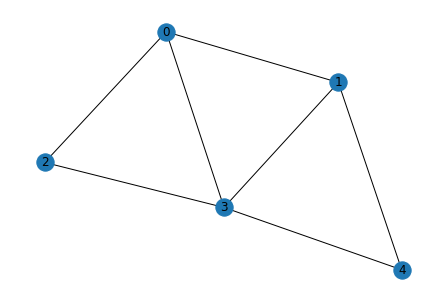

In [4]:
import networkx # une bibliothèque pour représenter un graphe
import numpy as np
import matplotlib.pyplot as plt
plt.figure()
# on définit le graphe avec son dictionnaire
graphe = networkx.Graph(d) 
networkx.draw(graphe, with_labels=True) # tracé du graphe
plt.show()


Avec un graphe non connexe.

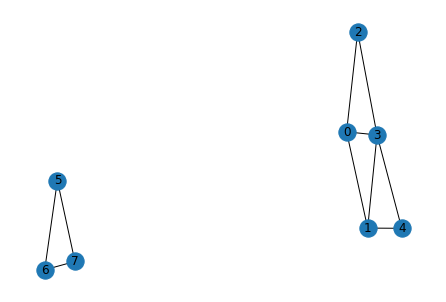

False


In [5]:
d2 = {0: [1, 2, 3], 1: [0, 3], 2: [0, 3], 3: [0, 1, 2, 4],
      4: [1, 3], 5: [6, 7], 6: [5, 7], 7: [5, 6]}
plt.figure()
networkx.draw(networkx.Graph(d2), with_labels=True)
plt.show()
print(connexe(d2))